# Ficha de exercícios 2

## 1 Leitura de nome de ficheiros de uma diretoria

No final de cada exercício, mostre no ecran o resultado pedido

a) Crie uma variável do tipo "lista" vazia chamda "Nomes_ficheiros" e outra do tipo "string" chamdas "Caminho"

In [1]:
lista=list()
caminho=str()

In [2]:
print(lista)
print(caminho)

[]



b) Preencha  lista com todos os ficheiros presentes na diretoria "Caminho".
Sugestão: utilize a biblioteca "os" a o use a funcão "listdir()"

In [3]:
caminho=('C:/Users/Admin/Desktop/projeto')
caminho

'C:/Users/Admin/Desktop/projeto'

In [4]:
import os
dirs = os.listdir(caminho)

for file in dirs:
    lista.append(file)
    
lista

['.ipynb_checkpoints',
 '20190208 - Glaucoma - Localization of Favea - Catia Machado.pdf',
 'anotacoes_projeto.txt',
 'artigos',
 'Baidu Research Open-Access Dataset - Introduction.pdf',
 'Basic_Python_3.ipynb',
 'dataset',
 'deep-learning-with-python-notebooks-master',
 'Folha de exercícios 1.ipynb',
 'Folha de exercícios 2.ipynb',
 'Python']

c) Altere o programa anterior de forma a que a lista apenas tenha ficheiros com uma determinada extensão, e.g. ".jpg"

In [5]:
lista=list()
for file in dirs:
    if file.endswith(".ipynb"):
        lista.append(file)
lista

['Basic_Python_3.ipynb',
 'Folha de exercícios 1.ipynb',
 'Folha de exercícios 2.ipynb']

d) Com base no códigos das lineas anteriores, crie uma função chamada "listaFicheirosDiretoria(caminho, tipo_ficheiro)", que passando parâmetro uma directoria e o tipo de ficheiro (e.g. ".png"), retorne uma lista de todos os ficheiros dessa diretoria com a referida extensão. 

In [6]:
def listaFicheirosDiretoria(caminho,tipo_ficheiro):
    import os
    
    lista=list()    
    
    dirs = os.listdir(caminho)
    
    for file in dirs:
        if file.endswith("."+tipo_ficheiro):
            lista.append(file)
    return lista

In [7]:
listaFicheirosDiretoria(caminho,'pdf')

['20190208 - Glaucoma - Localization of Favea - Catia Machado.pdf',
 'Baidu Research Open-Access Dataset - Introduction.pdf']

# 2 Ler e mostrar imagens

a) Faça a leitura de uma imagem do disco para uma matriz IMG 

In [8]:
import numpy as np 
from PIL import Image

img = Image.open('C:/Users/Admin/Desktop/XamarinLogo.png') 
IMG = np.array(img) 
print(IMG.shape)

IMG

(537, 1280, 4)


array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

b) Faça o plot da imagem no ecran

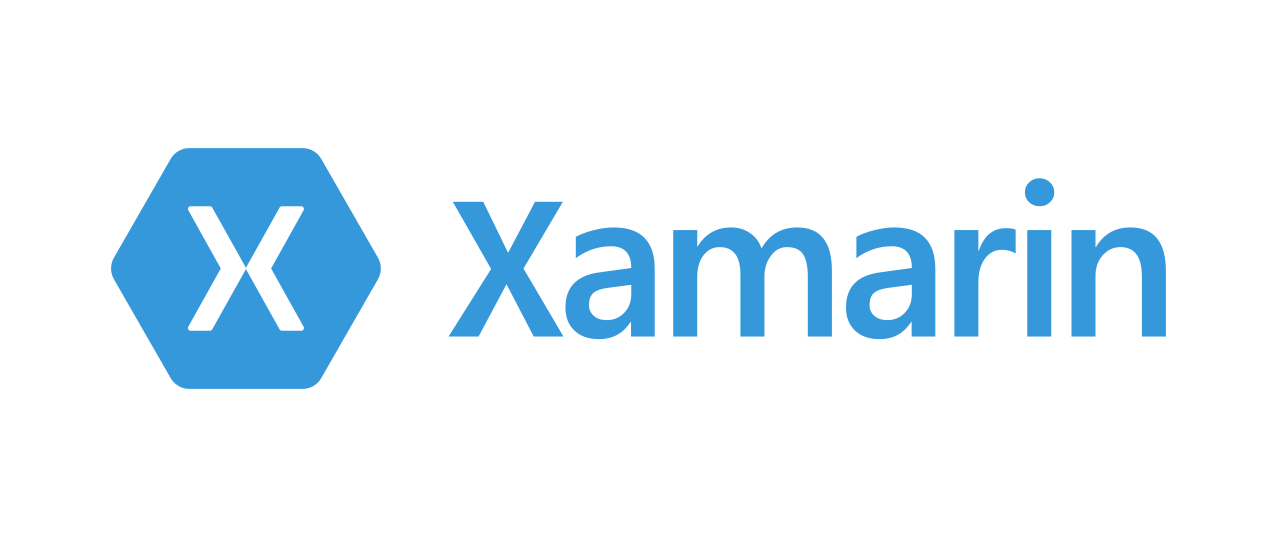

In [9]:
import numpy as np 
from PIL import Image

img = Image.open('C:/Users/Admin/Desktop/XamarinLogo.png') 

img

C) Faça o plot em a imagem aparece repteida em duas linhas e 3 colunas

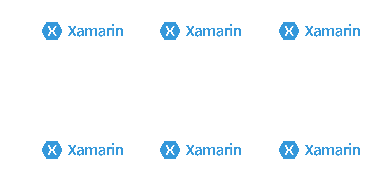

In [42]:
from matplotlib import pyplot as plt

fig = plt.figure()
gs = fig.add_gridspec(2, 3)

for i in range(2):
    for j in range(3):
        fig.add_subplot(gs[i, j])
        plt.imshow(img)
        plt.axis('off')


# 3 Implementação de uma convolução 2D

O seguinte vídeo mostra o que é uma convolução, como se calcula e o que é o padding.  https://www.youtube.com/watch?v=DYdfzN-57z8

a) Crie uma matriz IMG com dimensão 5x5 com valores de 1 nas linhas pares e 0 nas linhas impares.

In [48]:
IMG=np.zeros((5,5))
IMG

for i in range(5):
    if(i%2==1):
        IMG[i,:]=1
IMG

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

b) Crie uma matriz Mask "Interior", com dimensão 3x3, e preencha-a com valores pares, e.g. 2, 4, 6, 8,..., 18.

In [57]:
Interior=np.zeros((3,3))

cont=1

for i in range(3):
    for j in range(3):
        Interior[i,j]=2*cont
        cont+=1
        
Interior

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

c) Crie um ciclo, em que para cada passagem seja copiado um "retalho" 3x3 e guardado numa matriz chamada patchIMG, a começar no canto superior esquerdo se desloque sucessivamente para a direita uma coluna até que chegue ao fim da matriz à direita. Nessa altura deve começar no inicio da linha seguinte, sucessivamente até que que termine no canto inferior direito.

In [21]:
import numpy as np

patchIMG=np.zeros((3,3))
matrix=np.ones((10,10))

size_row=len(matrix)
size_col=len(matrix[0])

for i in range(size_row):
    for j in range(size_col):
        patchIMG=matrix
        

AttributeError: 'numpy.ndarray' object has no attribute 'crop'

d) Crei uma função "soma_produtos(patchIMG,Mask)" e calcule a soma de produtos dos elementos reciprocos, entre duas matrizes da mesma dimensão.

In [18]:
import numpy as np

def soma_produtos(patchIMG,Mask):
    soma=np.zeros((len(patchIMG),len(patchIMG[0])))
    for row in range(len(patchIMG)):
        for col in range(len(patchIMG[0])):
            soma[row,col]=patchIMG[row,col]+Mask[row,col]
    return soma

In [19]:
patchIMG=np.zeros((5,5))
Mask=np.ones((5,5))
soma_produtos(patchIMG,Mask)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

e) Faça função "convolucao_2D(IMG,Mask)" que combine o programas criados em c) e com a função da d) de forma a calcular os valores da convolução entre a imagem IMG e a mascara Mask e guardar o resultado num matriz Resultado_conv2D.

f) Ajuste o código anterior numa nova função "convolucao_2D_2(IMG,Mask)"de forma a termos uma matriz resultado com a mesma dimensão da mantriz IMG de entrada. A matriz deve ter padding com valores 0.

g)  Altere o código de f) e crie uma nova função "convolucao_2D_3(IMG,Mask)" de forma a poder definir o padding com os valores vizinhos.

h) Altere o código de g) e crei uma nova função "convolucao_2D_4(IMG,Mask)" de forma a calcular a convolução 2D para uma imagem IMG com qualquer dimensão. Faça o plot da imagem antes da convolução e depois da convolução.